# Monitoring long-term changes of precipitation in support of rain-fed farming

Production date: 31-12-2025, second version : 10-02-2026, third version : 19-02-2026

Produced by: 'CNRS'

## 🌍 Use case: Observing the regional evolution of rainfall

## ❓ Quality assessment question
 - __What is the variability of the observed precipitation over different regions?__


Precipitation is a fundamental component of the hydrological cycle. It significantly influences ecosystems, agriculture, water resources, and weather patterns. In recent decades, climate change has been altering precipitation patterns globally, resulting in shifts in intensity, frequency, and distribution.
Monitoring and understanding the precipitation changes are crucial for predicting future climate impacts and formulating adaptive strategies.
Satellite remote sensing has played a crucial role in this regard, providing comprehensive data on global precipitation. Unlike in situ measurements, which are limited to specific locations, satellite measurements offer extensive coverage across the globe, including remote and oceanic regions [[1](https://doi.org/10.3390/atmos9040138),[2]( https://doi.org/10.1007/s00382-022-06567-9)]. 
<!-- This comprehensive data allows for a more complete and accurate assessment of precipitation, enhancing our understanding of how climate change is modifying precipitation patterns and aiding in effective response planning. -->

The Global Precipitation Climatology Project (GPCP), the Copernicus Microwave-based Global Precipitation (COBRA) and the Global Interpolated RAinFall Estimation (GIRAFE) are international initiatives aimed at providing accurate, long-term records of global precipitation.
The estimate of precipitation intensity is obtained by the combination of microwave imagers on polar-orbiting satellites and infrared imagers on geostationary satellites regarding GPCP and GIRAFE products and only microwave imagers on polar-orbiting satellites for COBRA. The time period covered by these daily estimates varies depending on the product :

- GPCP from 1998 to 2024 
- COBRA from 2000 to 2017
- GIRAFE from 2002 to 2022

These datasets are available on the Copernicus Data Store (CDS) at [__Precipitation monthly and daily gridded data from 1979 to present derived from satellite measurements__](https://cds.climate.copernicus.eu/datasets/satellite-precipitation?tab=overview), [__Precipitation monthly and daily gridded data from 2000 to 2017 derived from satellite microwave observations__](https://cds.climate.copernicus.eu/datasets/satellite-precipitation-microwave?tab=overview) and [__Daily and monthly Global Interpolated RAinFall Estimation (GIRAFE) data derived from satellite observations__](https://cds.climate.copernicus.eu/datasets/satellite-precipitation-microwave-infrared?tab=overview) for GPCP, COBRA and GIRAFE respectively. There are several versions of GPCP. For this notebook, the choice is based on the evaluation of the latest version, 3.3, which is available in 0.5°/daily. Comparisons between other versions are available on CDS [[7]](https://doi.org/10.1175/JCLI-D-23-0123.1)

The following notebook provides a clear example of computing the climatological annual cycle of daily precipitation and computing the precipitation trend, considering the uncertainties present in the different datasets. This ensures an accurate estimation of the uncertainty in the fitted trend.

The analysis focuses on the tropical belt with an emphasis on the Sahel region, located between the Sahara Desert to the north and the humid tropical savanna to the south. The Sahel is a critical area for monitoring precipitation trends due to its significant dependence on the Hadley cell circulation. Additionally, this region experiences large interannual and decadal variability in rainfall, which profoundly impacts agriculture, water resources, and living conditions. Monitoring precipitation trends in the Sahel is essential for understanding the effects of climate change and for developing effective water management and agricultural strategies to enhance food security for the local population.
<!--The analysis focuses on the Sahel region, but the geolocation can be adjusted to study any region of interest.-->


## 📢 Quality assessment statement 

```{admonition} These are the key outcomes of this assessment
:class: note

- Precipitation estimates from GPCP, GIRAFE and COBRA, fall within the range seen in the literature [[6]](https://doi.org/10.1088/1748-9326/ab6a22) for the climatological annual cycle of daily precipitation over the common period 2001–2013 in the 20°N–20°S region. However, they exhibit regional biases that vary across the studied area. 

- The uncertainty of the long-term linear trend is affected by possible autocorrelation of the noise in the data. Thus, the trend uncertainty is corrected as suggested by [[4](https://doi.org/10.1029/98JD00995)].

- All three products show mostly positive and relatively similar trends over the Sahel and the 20°N–20°S region for both the common period (2002–2018) and their respective periods, except for COBRA over the Sahel, which exhibits a higher positive trend, and GIRAFE, which shows a negative trend during the common period.

- GPCP and GIRAFE exhibit more similar uncertainties across the studied regions compared to COBRA, which shows greater variability. Overall, the uncertainties of the three datasets are of the same order of magnitude.

- The tau values and 95% confidence intervals for the precipitation trends over both regions are mostly positive for each product which indicates an increase of precipitation with time.     

- The trend values and the associated uncertainties of each product over the Sahel region are consistent with the literature [[2](https://doi.org/10.1007/s00382-022-06567-9), [3](https://doi.org/10.1002/wcc.591)].
```

## 📋 Methodology

Precipitation observations from GPCP, GIRAFE and COBRA datasets are downloaded from the Climate Data Store for the tropical belt region (20°N-20°S) and the Sahel region, covering the period 1998-2023, 2002-2022 and 2000-2017, respectively. The datasets have a resolution of 1° for GIRAFE and COBRA and 0.5° for GPCP. Only GIRAFE and COBRA provide daily precipitation estimates with associated uncertainties.

The precipitation amount is averaged annually and across the region of interest. The uncertainty of the mean is computed under the assumption that each measurement is independent which is a way of propagating errors when spatial and temporal dependencies are unknown. The uncertainties for each grid box are averaged quadratically. Then, the uncertainty of the mean is obtained by scaling with the square root of the number of observations:
$$\sigma_{year} = \frac{1}{\sqrt{N}} \sqrt{ \frac{\sum_{gridbox} \sum_{month} \sigma_{g,m}^2}{N} }$$
where $\sigma_{g,m}$ is the error associated to each measurement, $\sigma_{year}$ is the resulting uncertainty of the precipitation average, and $N$ is the total number of data over the studied region for one year.
As GPCP does not provide uncertainty estimates, we used the temporal and spatial standard deviation of precipitation over the studied region for one year. Then, $\sigma_{year}$ is calculated as follows :

$$\sigma_{year} =  \frac{\sigma_{std}}{\sqrt{N}} $$

The obtained uncertainties $\sigma_{year}$ are taken into account in the fit in order to obtain the correct trend uncertainty.
Following [4], the trend uncertainty must be corrected with a factor that depends on the autocorrelation of the precipitation time series. The correction is:

$$ \sigma_{corrected} = \sigma_{fit} \sqrt{\frac{1+\phi}{1-\phi}}$$

where $\sigma_{fit}$ is the uncertainty obtained from the fit procedure, and $\sigma_{corrected}$ is the true uncertainty of the trend.
Lastly, the 95% confidence level of the trend measurement is computed.




The analysis comprises the following steps:

**[](section-1)**
 - Import the relevant packages. Define the parameters of the analysis and set the dataset requests

**[](section-2)**
 - Download the precipitation amount of COBRA, GIRAFE and GPCP products and their uncertainties provided by the CDS in the 20°N-20°S region.

**[](section-3)**
 - The precipitation amount is averaged per day of the year over the 2001-2013 period across the entire 20°N-20°S region and the Sahel region.

**[](section-4)**
 - The precipitation amount is averaged annually and across the entire 20°N-20°S region and the Sahel region.
 - The precipitation errors are propagated to the means, assuming full independence among the measurements.
 - A linear fit is performed on the time series, using the precipitation uncertainties to best estimate the true slope.
 - The time series and the associated linear trend are visualized and compared to the known literature.



## 📈 Analysis and results

(section-1)=
### 1. Choose the parameters to use and setup code

#### Import packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
from scipy.optimize import curve_fit
from scipy.stats import t, kendalltau
import numpy as np
import cartopy.crs as ccrs
import regionmask
from c3s_eqc_automatic_quality_control import download, utils

plt.style.use("seaborn-v0_8-notebook")

import os
os.environ["CDSAPI_RC"] = os.path.expanduser("~/carbone_sullivan/.cdsapirc")

#### Define parameters

In [2]:
# Region of interest
lat_min = [-20,12]
lat_max = [20,20]
lon_min = [-180,-17]
lon_max = [180,35]

# setup plot
precipitation_product = ['COBRA', 'GPCP', 'GIRAFE']
color_point = ['darkblue', 'darkgreen','orange']
color_curve = ['blue', 'green', 'red']

#### Plot the map

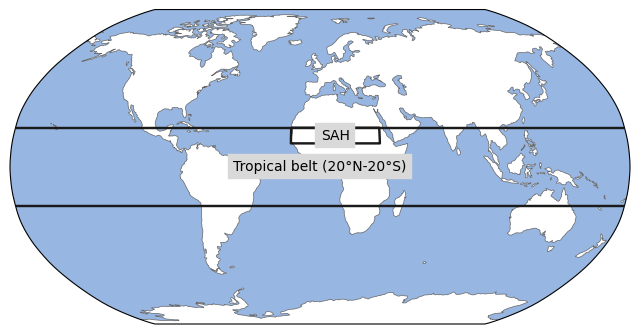

In [3]:
# Definition of the region of interest : Sahel
Sahel = np.array([[lon_min[1], lat_max[1]], [lon_max[1], lat_max[1]], [lon_max[1], lat_min[1]], [lon_min[1], lat_min[1]]])
tropique = np.array([[lon_min[0], lat_max[0]], [lon_max[0], lat_max[0]], [lon_max[0], lat_min[0]], [lon_min[0], lat_min[0]]])

regions = regionmask.Regions(
    [Sahel, tropique],
    names=["Sahel", "Tropiques"],
    abbrevs=["SAH", "Tropical belt (20°N-20°S)"],
    name="Regions_climatiques"
)

ax = regions.plot(
    projection=ccrs.Robinson(),
    label="abbrev",
    add_ocean=True,
)
ax.set_global()


_Figure 1: World map showing the tropical belt (20°S–20°N) and the Sahel region studied in this notebook._

#### Set the data request

In [10]:
# Region
lon_slice = slice(-180, 180)
lat_slice = slice(-20, 20)

# Define requests
requests = {}

time_request = {
    "month": [f"{month:02d}" for month in range(1, 13)],
    "day": [f"{day:02d}" for day in range(1, 32)],
}

requests["satellite-precipitation-microwave"] = time_request | {
    "variable": "all",
    "time_aggregation": "daily",
    "version": ["v1_0"],
    "year": [str(year) for year in range(2000, 2018)],
}

requests["satellite-precipitation"] = time_request | {
    "variable": "all",
    "time_aggregation": "daily_mean",
    "version": ["v3_3"],
    "year": [str(year) for year in range(1998, 2024)],
}
requests["satellite-precipitation-microwave-infrared"] = time_request | {
    "variable": "all",
    "time_aggregation": "daily",
    "year": [str(year) for year in range(2002, 2023)],
}

# Download
def reindex_coords(ds):
    instruments = [
        "all",
        "SSMI",
        "SSMIS",
        "MHS",
        "AMSU-B",
        "TMI",
        "AMSR-E",
    ]
    platforms = platforms = [
        "noaa15",
        "noaa16",
        "noaa17",
        "noaa18",
        "noaa19",
        "f13",
        "f14",
        "f15",
        "f16",
        "f17",
        "f18",
        "aqua",
        "trmm",
    ]

    if "instrument_id" in ds.dims:
        ds = ds.reindex(instrument_id=range(len(instruments)))
        ds["instrument_mask"] = ds["instrument_name"].notnull()
        ds["instrument_name"] = ("instrument_id", instruments)
        ds = ds.set_coords("instrument_name")

    if "platform_id" in ds.dims:
        ds = ds.reindex(platform_id=range(1, len(platforms) + 1))
        ds["platform_mask"] = ds["platform_name"].notnull()
        ds["platform_name"] = ("platform_id", platforms)
        ds = ds.set_coords("platform_name")

    return ds

(section-2)=
### 2. Download the dataset

In [7]:
datasets = {}
for collection_id, request in requests.items():
    print(f"{collection_id=}")
    datasets[collection_id] = download.download_and_transform(
        collection_id,
        request,
        chunks={"year": 1, "month": 1},
        transform_func=utils.regionalise,
        transform_func_kwargs={
            "lon_slice": lon_slice,
            "lat_slice": lat_slice,
        },
        preprocess=reindex_coords,
    )

#ds_GPCP = download.download_and_transform(
#    collection_id,
#    download.update_request_date(request, start, stop, stringify_dates=True),
#    chunks=chunks,
#)

collection_id='satellite-precipitation-microwave'


100%|██████████| 216/216 [01:19<00:00,  2.70it/s]


collection_id='satellite-precipitation'


100%|██████████| 300/300 [01:29<00:00,  3.34it/s]


collection_id='satellite-precipitation-microwave-infrared'


100%|██████████| 252/252 [01:24<00:00,  2.97it/s]


(section-3)=
### 3. Daily precipitation climatology

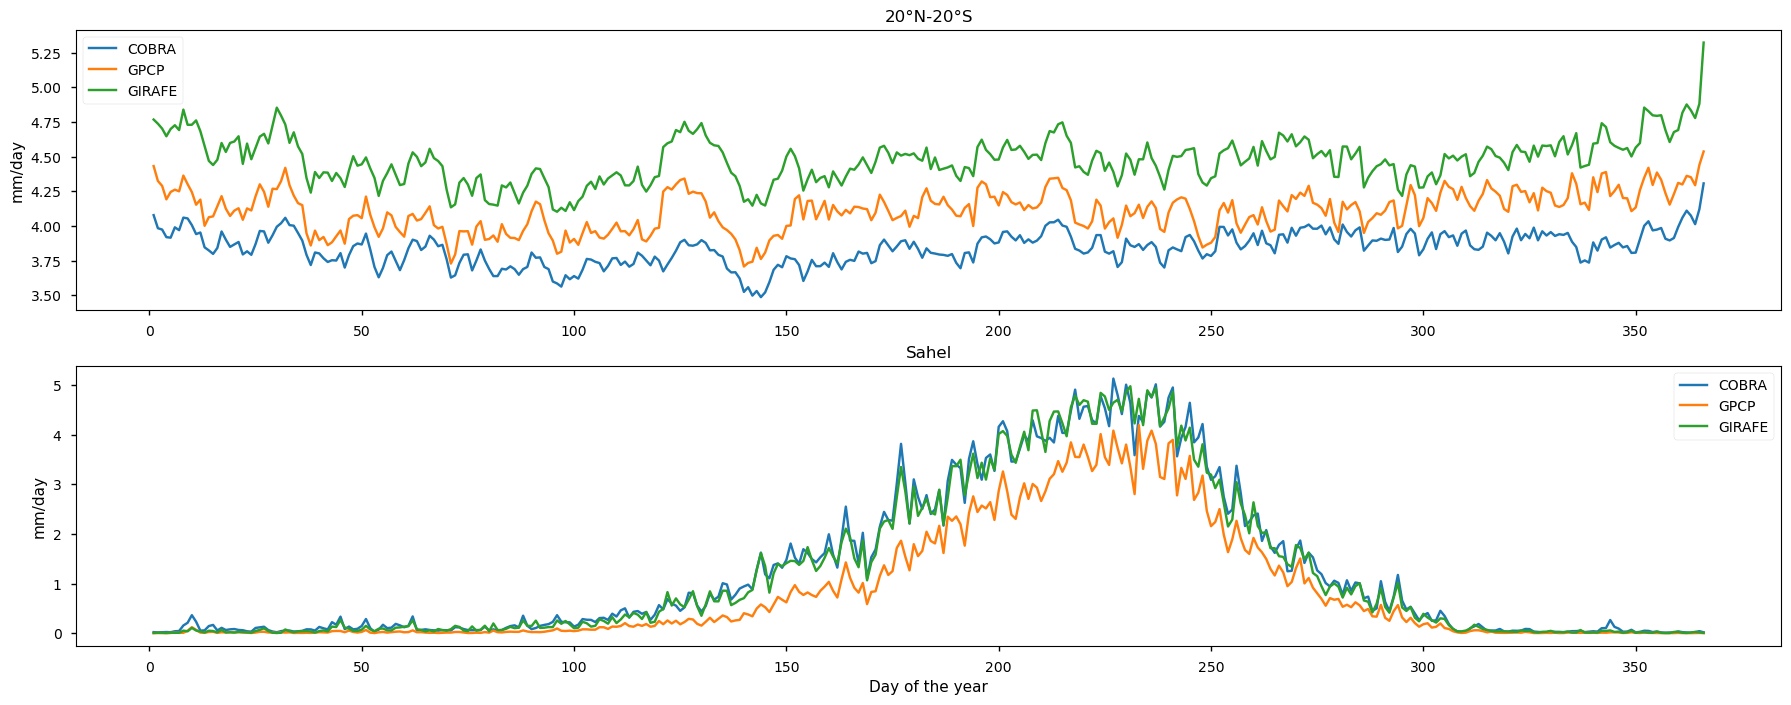

In [38]:
fig , axs = plt.subplots(2, 1, figsize =(22,8))
for k in range(2) :
    if k == 0 :
        for idx, product in enumerate (datasets) :
            if product == 'satellite-precipitation-microwave-infrared' :
                da = datasets[product]['precipitation'].sel( latitude = slice(lat_min[k] ,lat_max[k]), time = slice("2002-01-01", "2013-12-31" )).groupby("time.dayofyear").mean(dim = ['time', "longitude", "latitude"], skipna = True)
            else :
                da = datasets[product]['precip'].sel( latitude = slice(lat_min[k] ,lat_max[k]), time = slice("2002-01-01", "2013-12-31" )).groupby("time.dayofyear").mean(dim = ['time', "longitude", "latitude"], skipna = True)
            
            axs[k].plot(da['dayofyear'],da, label = f'{precipitation_product[idx]}')
            axs[k].set_title('20°N-20°S')
    else :
        for idx, product in enumerate (datasets) :
            if product == 'satellite-precipitation-microwave-infrared' :
                da = datasets[product]['precipitation'].sel( latitude = slice(lat_min[k] ,lat_max[k]),longitude = slice(lon_min[k] ,lon_max[k]), time = slice("2002-01-01", "2013-12-31" )).groupby("time.dayofyear").mean(dim = ['time', "longitude", "latitude"], skipna = True)
            else :
                da = datasets[product]['precip'].sel( latitude = slice(lat_min[k] ,lat_max[k]),longitude = slice(lon_min[k] ,lon_max[k]), time = slice("2002-01-01", "2013-12-31" )).groupby("time.dayofyear").mean(dim = ['time', "longitude", "latitude"], skipna = True)
            
            axs[k].plot(da['dayofyear'],da, label = f'{precipitation_product[idx]}')
            axs[k].set_title('Sahel')
            axs[k].set_xlabel("Day of the year")

    axs[k].legend()
    axs[k].set_ylabel("mm/day")
    

_Figure 2 : Climatological (2001-2013) annual cycle of daily precipitation (mm/day) over 20°N-20°S (upper panel) and over Sahel region (lower panel) for each precipitation product._

Over both regions, each precipitation product appears to exhibit the same pattern with an existing bias more or less important between them. These biases vary depending on the type of surface, as can be seen over the Sahel region. The existence of these biases and their variability have already been documented between GIRAFE-GPCP (3.2) [[5]](https://doi.org/10.5194/essd-17-4097-2025) and COBRA-GPCP (1.3) in the confluence page of COBRA : [__Product Quality Assessment Report (PQAR)__](https://confluence.ecmwf.int/pages/viewpage.action?pageId=278552380#COBRA:ProductQualityAssessmentReport(PQAR)-section2_3_22.3.2Comparisonwithglobaldatasets).
The climatological annual cycle over 20°N-20°S of all three products are in the range seen in the literature and present the same pattern. It is interesting to note that over the Sahel region, all three products also present the same pattern as over the 20°N-50°N  but with a slightly shifted maximum [[6]](https://doi.org/10.1088/1748-9326/ab6a22). 

(section-4)=
### 4. Long term trend and uncertainty

#### Compute the year average precipitation and fitting the data 

#### Results

We are assuming the errors to be independent. Thus, we perform a quadratic mean. 

20°N-20°S

COBRA 18 years                                                                                                   COBRA 16 years                                                                                                  
Kendall's tau: 0.09803921568627452                                                                              -0.15                                                                              
P-value: 0.6009311332228355                                                                                      0.45028488627204627                                                                                      
95% confidence interval for the slope: [np.float64(0.0042269686714095445), np.float64(0.005382611121273389)] 	[np.float64(-0.002590329646249522), np.float64(-0.001411808636107526)]


GPCP 25 years                                                                                                   GPCP 16 years                                        

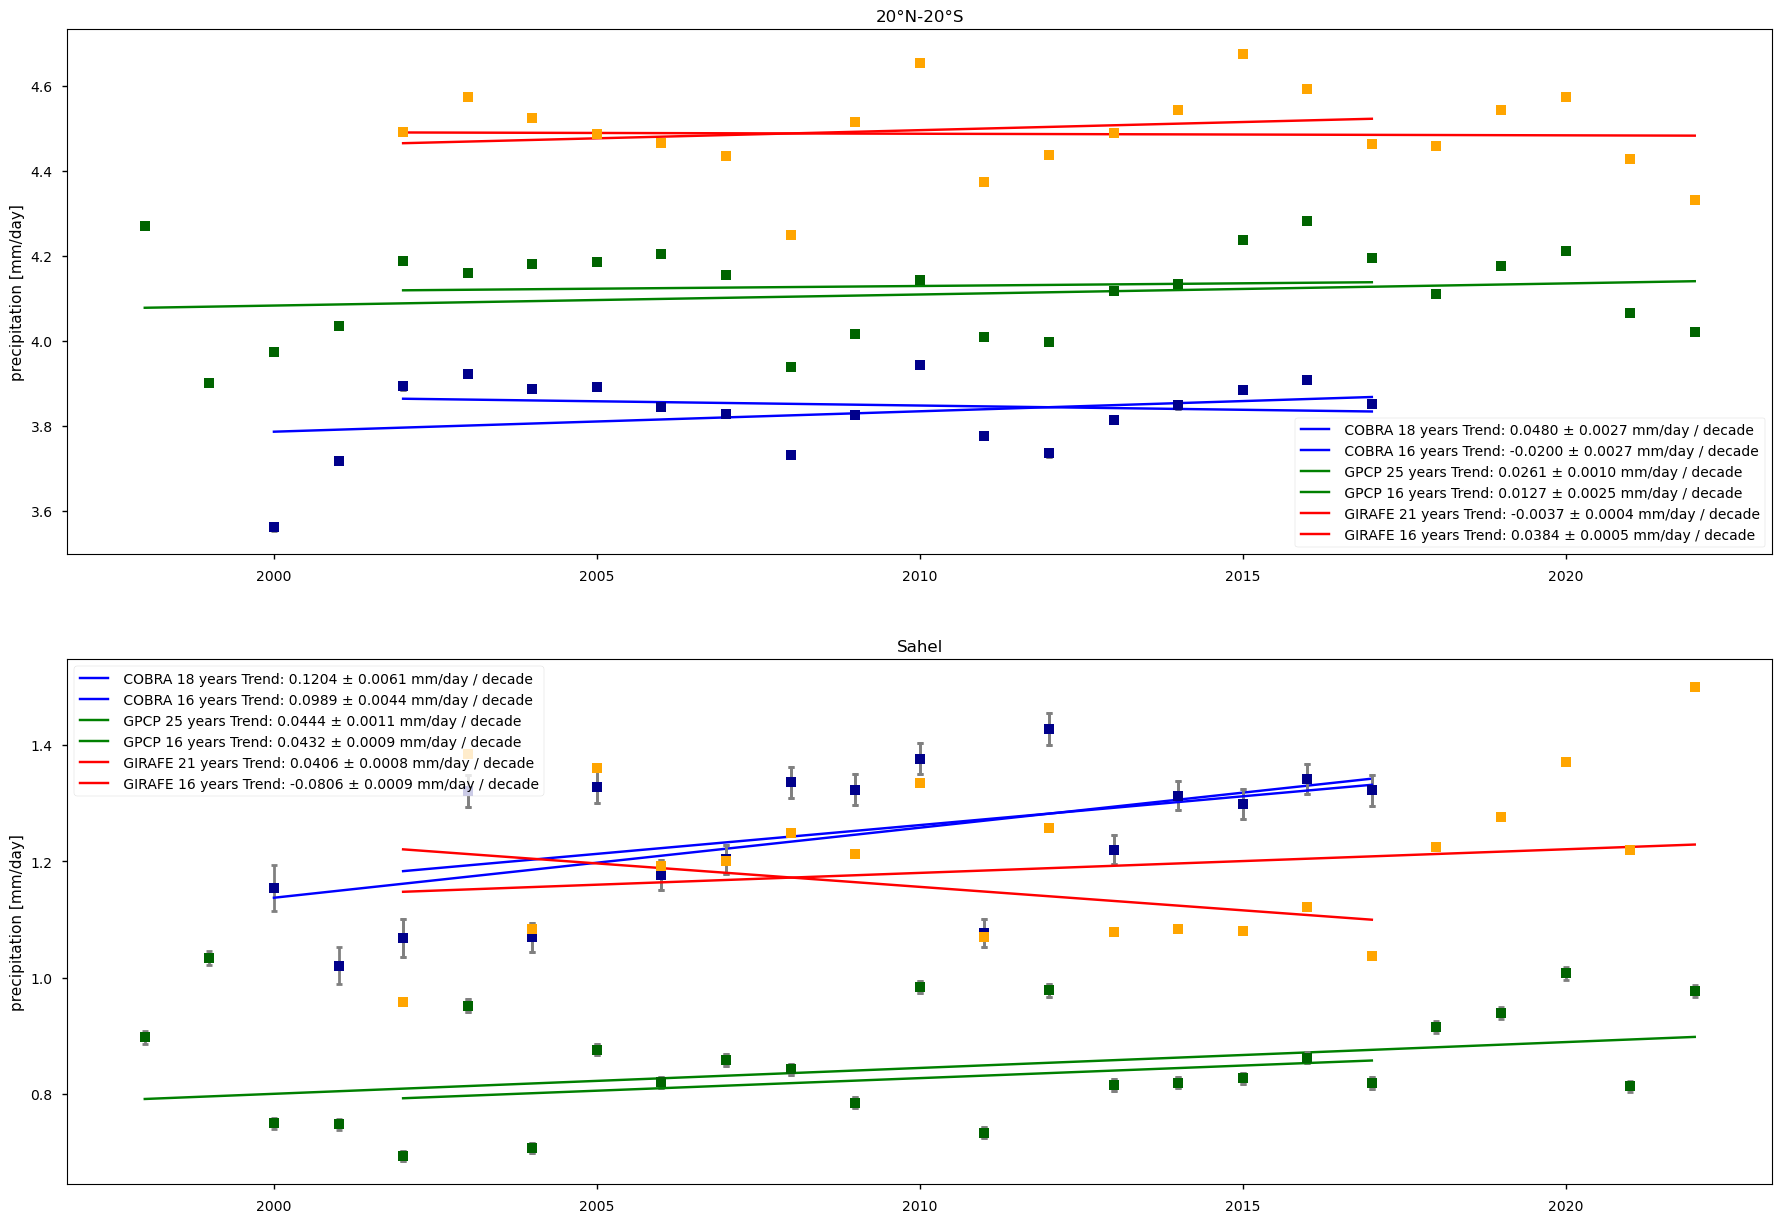

In [39]:
fig , axs = plt.subplots(2, 1, figsize =(22,15))
for j in range (2) : 
    for idx, product in enumerate (datasets) :
        setup_print = {"name" : [], "tau" : [], "P" : [], "confidence" : []}
        for k in range (2):
            if k==0 :
                if product == 'satellite-precipitation-microwave' :
                    da_error = datasets[product]['precip_stdv'].sel(longitude = slice(lon_min[j],lon_max[j]), latitude = slice (lat_min[j], lat_max[j]))
                    ds_precip = datasets[product]['precip'].sel(longitude = slice(lon_min[j],lon_max[j]), latitude = slice (lat_min[j], lat_max[j])).mean(['latitude', 'longitude']).resample(time='YE').mean()
                if product == 'satellite-precipitation-microwave-infrared' : 
                    da_error = datasets[product]['sampling_error'].sel(longitude = slice(lon_min[j],lon_max[j]), latitude = slice (lat_min[j], lat_max[j]))
                    ds_precip = datasets[product]['precipitation'].sel(longitude = slice(lon_min[j],lon_max[j]), latitude = slice (lat_min[j], lat_max[j])).mean(['latitude', 'longitude']).resample(time='YE').mean()
                if product == 'satellite-precipitation' :
                    da_error =  datasets[product]['precip'].sel(longitude = slice(lon_min[j],lon_max[j]), latitude = slice (lat_min[j], lat_max[j])).resample(time='YE').std(dim=('time', 'latitude', 'longitude'))
                    da_error = da_error / (datasets[product].sel(longitude = slice(lon_min[j],lon_max[j]), latitude = slice (lat_min[j], lat_max[j])).latitude.data.size * datasets[product].sel(longitude = slice(lon_min[j],lon_max[j]), latitude = slice (lat_min[j], lat_max[j])).longitude.data.size * 365) ** 0.5
                    ds_precip = datasets[product]['precip'].sel(longitude = slice(lon_min[j],lon_max[j]), latitude = slice (lat_min[j], lat_max[j])).mean(['latitude', 'longitude']).resample(time='YE').mean()
                     
            if k==1 :
                if product == 'satellite-precipitation-microwave' :
                    da_error = datasets[product]['precip_stdv'].sel(longitude = slice(lon_min[j],lon_max[j]), latitude = slice (lat_min[j], lat_max[j]), time = slice("2002-01-01", "2017-12-31"))
                    ds_precip = datasets[product]['precip'].sel(longitude = slice(lon_min[j],lon_max[j]), latitude = slice (lat_min[j], lat_max[j]), time = slice("2002-01-01", "2017-12-31")).mean(['latitude', 'longitude']).resample(time='YE').mean()
                if product == 'satellite-precipitation-microwave-infrared' : 
                    da_error = datasets[product]['sampling_error'].sel(longitude = slice(lon_min[j],lon_max[j]), latitude = slice (lat_min[j], lat_max[j]), time = slice("2002-01-01", "2017-12-31"))
                    ds_precip = datasets[product]['precipitation'].sel(longitude = slice(lon_min[j],lon_max[j]), latitude = slice (lat_min[j], lat_max[j]), time = slice("2002-01-01", "2017-12-31")).mean(['latitude', 'longitude']).resample(time='YE').mean()
                if product == 'satellite-precipitation' :
                    da_error =  datasets[product]['precip'].sel(longitude = slice(lon_min[j],lon_max[j]), latitude = slice (lat_min[j], lat_max[j]), time = slice("2002-01-01", "2017-12-31")).resample(time='YE').std(dim=('time', 'latitude', 'longitude'))
                    da_error = da_error / (datasets[product].sel(longitude = slice(lon_min[j],lon_max[j]), latitude = slice (lat_min[j], lat_max[j])).latitude.data.size * datasets[product].sel(longitude = slice(lon_min[j],lon_max[j]), latitude = slice (lat_min[j], lat_max[j])).longitude.data.size * 365) ** 0.5
                    ds_precip = datasets[product]['precip'].sel(longitude = slice(lon_min[j],lon_max[j]), latitude = slice (lat_min[j], lat_max[j]), time = slice("2002-01-01", "2017-12-31")).mean(['latitude', 'longitude']).resample(time='YE').mean()
                    
            if product != 'satellite-precipitation'  :
                da_error = da_error  ** 2
                da_error = da_error.mean(['latitude', 'longitude']).resample(time='YE').mean()
                da_error = da_error  ** 0.5
                da_error = da_error / (datasets[product].sel(longitude = slice(lon_min[j],lon_max[j]), latitude = slice (lat_min[j], lat_max[j])).latitude.data.size * datasets[product].sel(longitude = slice(lon_min[j],lon_max[j]), latitude = slice (lat_min[j], lat_max[j])).longitude.data.size * 365) ** 0.5
          
    
            X = ds_precip['time.year'].data 
            P = ds_precip.data
            Perr = da_error.data
            
            # Linear Model to fit
            def linear_model(x, a, b):
                return a * x + b
            
            # Perform the fit, using weights as the inverse of the uncertainties
            popt, pcov = curve_fit(linear_model, X, P, sigma=Perr, absolute_sigma=True)
            
            # Extract the fitting parameters
            slope, intercept = popt
            
            # Calculate the uncertainties in the fitting parameters
            perr = np.sqrt(np.diag(pcov))
            slope_err = perr[0]
            
            
            # Correction due to autocorrelation
            phi = np.corrcoef(P[1:],P[:-1])[0,1]
            k = np.sqrt((1+phi)/(1-phi))
            slope_err = slope_err * k
            
            
            # Calculate the 95% confidence interval for the slope
            alpha = 0.05  # 95% confidence level
            n = len(P)  # Number of data points
            p = len(popt)  # Number of parameters
            dof = max(0, n - p)  # Degrees of freedom
            t_val = t.ppf(1.0 - alpha / 2., dof)  # T-value for the 95% confidence interval
            confidence_interval = t_val * slope_err  # confidence interval
        
            axs[j].errorbar(X, P, 2*Perr, lw=0, 
                     capsize=2, markersize=7, marker='s', color=color_point[idx], ecolor='gray', elinewidth=2, capthick=2)
        
            axs[j].plot(X, linear_model(X, *popt), c=color_curve[idx], label=f' {precipitation_product[idx]} {len(X)} years Trend: {float(slope*10):.4f} ± {float(slope_err*10):.4f} mm/day / decade')
            if j == 0 :
                axs[j].set_title('20°N-20°S')
            if j == 1 :
                axs[j].set_title('Sahel')
            axs[j].set_ylabel('precipitation [mm/day]')
            axs[j].legend()
        
            tau, p_value = kendalltau(X, P)

            setup_print["name"].append(f"{precipitation_product[idx]} {len(X)} years")
            setup_print["tau"].append(tau)
            setup_print["P"].append(p_value)
            setup_print["confidence"].append([slope - confidence_interval.compute(),slope + confidence_interval.compute()])
            
        if j == 0 and idx == 0 :
                print("20°N-20°S\n")
        if j == 1 and idx == 0 :
            print("Sahel\n")
            
        print(f"{setup_print["name"][0]}",  f"{setup_print["name"][1]:^210}" )
        print(f"Kendall's tau: {setup_print["tau"][0]}",  f"{setup_print["tau"][1]:^160}")
        print(f"P-value: {setup_print["P"][0]}", f"{setup_print["P"][1]:^190}")
        print(f"95% confidence interval for the slope: {setup_print["confidence"][0]}",f"\t{setup_print["confidence"][1]}")
        print("\n")
    

_Figure 3 : linear fit of precipitation data over time for each product : GIRAFE, COBRA and GPCP over 20°N-20°S region (upper panel) and Sahel region (lower panel). The colored squares represent the observed precipitation values, while the gray error bars correspond to two times the uncertainty of each measurement. The colored lines are the best-fit linear model for the data, indicating the trend in precipitation over each period. Each trend value is reported in the legend with the 95% confidence interval. The tau value, the P-value and 95% confidence interval for the slope are given above the figure for each product, each period and each region._

Over the 20°N–20°S region, all three products generally exhibit positive trends during both periods. These trends are comparable among datasets, except for GIRAFE over its respective period and COBRA during the common period. Uncertainties remain of similar magnitude across products, with the exception of GIRAFE, which displays substantially lower values.

Over the Sahel region, positive trends are also observed for most products and periods, except for GIRAFE during the common period. COBRA stands out by showing consistently stronger positive trends than the other datasets. Uncertainties are again comparable among products, although COBRA exhibits markedly higher values.

GPCP shows the greatest temporal stability, with relatively consistent trend estimates between periods in both regions, in contrast to GIRAFE and COBRA. Moreover, only COBRA displays substantial regional differences in uncertainty.

The Kendall’s tau analysis yields predominantly positive values, indicating a significant positive association between precipitation and time over both regions. Overall, the estimated trends and associated uncertainties over the Sahel are consistent with those reported in previous studies. [[2](https://doi.org/10.1007/s00382-022-06567-9), [3](https://doi.org/10.1002/wcc.591)].  

## ℹ️ If you want to know more
### Key resources
Some key resources and further reading were linked throughout this assessment.

The CDS catalogue entry for the data used is:
- Precipitation monthly and daily gridded data from 1979 to present derived from satellite measurements:
https://cds.climate.copernicus.eu/datasets/satellite-precipitation?tab=overview

- Daily and monthly Global Interpolated RAinFall Estimation (GIRAFE) data derived from satellite observations:
https://cds.climate.copernicus.eu/datasets/satellite-precipitation-microwave-infrared?tab=overview

- Precipitation monthly and daily gridded data from 2000 to 2017 derived from satellite microwave observations:
https://cds.climate.copernicus.eu/datasets/satellite-precipitation-microwave?tab=overview


Code libraries used:
- [C3S EQC custom functions](https://github.com/bopen/c3s-eqc-automatic-quality-control/tree/main/c3s_eqc_automatic_quality_control), `c3s_eqc_automatic_quality_control`, prepared by [B-Open](https://www.bopen.eu/)


### Reference/Useful material
[[1]](https://doi.org/10.3390/atmos9040138) Adler, R.F.; Sapiano, M.R.P.; Huffman, G.J.; Wang, J.-J.; Gu, G.; Bolvin, D.; Chiu, L.; Schneider, U.; Becker, A.; Nelkin, E.; et al. The Global Precipitation Climatology Project (GPCP) Monthly Analysis (New Version 2.3) and a Review of 2017 Global Precipitation. Atmosphere 2018, 9, 138. https://doi.org/10.3390/atmos9040138 

[[2]](https://doi.org/10.1007/s00382-022-06567-9) Gu, G., Adler, R.F. Observed variability and trends in global precipitation during 1979–2020. Clim Dyn 61, 131–150 (2023). https://doi.org/10.1007/s00382-022-06567-9

[[3]](https://doi.org/10.1002/wcc.591) Biasutti M. Rainfall trends in the African Sahel: Characteristics, processes, and causes. WIREs Clim Change. 2019; 10:e591. https://doi.org/10.1002/wcc.591

[[4]](https://doi.org/10.1029/98JD00995) Weatherhead, E. C., Reinsel, G. C., Tiao, G. C., Meng, X.-L., Choi, D., Cheang, W.-K., Keller, T., DeLuisi, J., Wuebbles, D. J., Kerr, J. B., Miller, A. J., Oltmans, S. J., and Frederick, J. E.: Factors af-
fecting the detection of trends: Statistical considerations and applications to environmental data, J. Geophys. Res.-Atmos., 103, 17149–17161, https://doi.org/10.1029/98JD00995, 1998.

[[5]](https://doi.org/10.5194/essd-17-4097-2025) Konrad, H., Roca, R., Niedorf, A., Finkensieper, S., Schröder, M., Cloché, S., Panegrossi, G., Sanò, P., Kidd, C., Jucá Oliveira, R. A., Fennig, K., Sikorski, T., Lemoine, M., and Hollmann, R.: GIRAFE v1: a global climate data record for precipitation accompanied by a daily sampling uncertainty, Earth Syst. Sci. Data, 17, 4097–4124, https://doi.org/10.5194/essd-17-4097-2025, 2025.

[[6]](https://doi.org/10.1088/1748-9326/ab6a22) Margot Bador, Lisa V Alexander, Steefan Contractor and Remy Roca: Diverse estimates of annual maxima daily precipitation in 22 state-of-the-art quasi-global land observation datasets, Environ. Res. Lett. 15 035005, https://iopscience.iop.org/article/10.1088/1748-9326/ab6a22, 2020. 

[[7]](https://doi.org/10.1175/JCLI-D-23-0123.1) Huffman, G. J., R. F. Adler, A. Behrangi, D. T. Bolvin, E. J. Nelkin, G. Gu, and M. R. Ehsani, 2023: The New Version 3.2 Global Precipitation Climatology Project (GPCP) Monthly and Daily Precipitation Products. J. Climate, 36, 7635–7655, https://doi.org/10.1175/JCLI-D-23-0123.1
